In [1]:
!pip install preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

!git clone https://github.com/csipapicsa/2ndYearProject-NLP.git
!pip install transformers
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import urllib.request
import csv
import importlib 
!pip install contractions
f = importlib.import_module('2ndYearProject-NLP.functions')
import numpy as np

fatal: destination path '2ndYearProject-NLP' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
PATH = {}
PATH["dataset_classification"] = "2ndYearProject-NLP/dataset/classification/"

#PATH["music_reviews_test"] = PATH["2ndYearProject-NLP/dataset/"] + "music_revies_test.json"

PATH["dataset_labeling"] = "2ndYearProject-NLP/dataset/seq_labeling/"
PATH["music_reviews_train"] = PATH["dataset_classification"] + "music_reviews_train.json.gz"
PATH["music_reviews_dev"] = PATH["dataset_classification"] + "music_reviews_dev.json.gz"
PATH["music_reviews_test"] = PATH["dataset_classification"] + "music_reviews_test.json.gz"
PATH["hard_sentences"] = PATH["dataset_classification"] + "hard_sentences.json.gz"

train = f.readJson(PATH["music_reviews_train"])
dev = f.readJson(PATH["music_reviews_dev"])
test = f.readJson(PATH["music_reviews_test"])

sent_dict = {"positive": 1, "negative": 0, "POSITIVE": 1, "NEGATIVE":0}

# read the train data
data = train
train_sent = []
train_sentiment = []
train_idx = []
train_missing_indexies = []
y_train = []
length_of_sentencies_counter = []
for i in range(len(data)):
    try:
        train_sent.append(data[i]["reviewText"])
        train_sentiment.append(data[i]["sentiment"])
        train_idx.append(i)
        y_train.append(sent_dict[data[i]["sentiment"]])
        length_of_sentencies_counter.append(len(data[i]["reviewText"].split()))
    except KeyError:
        train_missing_indexies.append(i)
        continue
print(train_missing_indexies)

# read the dev data 
data = dev
dev_sent = []
dev_sentiment = []
dev_idx = []
dev_missing_indexies = []
dev_y_train = []
for i in range(len(data)):
    try:
        dev_sent.append(data[i]["reviewText"])
        dev_sentiment.append(data[i]["sentiment"])
        dev_idx.append(i)
        dev_y_train.append(sent_dict[data[i]["sentiment"]]) 
    except KeyError:
        dev_missing_indexies.append(i)
        continue
print(dev_missing_indexies)

### reading test data
df = test
test_review = []
test_sentiment = []
test_idx = []
test_missing_ind = []
test_y_train = []
for i in range(len(df)):
  try:
    test_review.append(df[i]['reviewText'])
    test_sentiment.append(df[i]['sentiment'])
    test_idx.append(i)
    test_y_train.append(sent_dict[df[i]['sentiment']])
  except KeyError:
    test_missing_ind.append(i)
    continue

# make dev_sentiment into vector for checking accuracy laters... 
dev_classvec = np.array([sent_dict[s] for s in dev_sentiment])
test[0]

Number of data:  100000
Number of data:  10000
Number of data:  10000
[4603, 4838, 16019, 18229, 19785, 23315, 28397, 28834, 33359, 43138, 43539, 43690, 44008, 44477, 44972, 48811, 49317, 50106, 51717, 52286, 55555, 56171, 57223, 58328, 58799, 58866, 59525, 59739, 61046, 61914, 61916, 62831, 63208, 72268, 78944, 79067, 80093, 80637, 80658, 81640, 81900, 82510, 83138, 83145, 83615, 84761, 87112, 88895, 88984, 89132, 91949, 94301, 94727, 99641]
[2900, 4294, 5135, 8540]


{'asin': 'B007Y1AMHE',
 'id': 0,
 'reviewText': 'ok',
 'reviewTime': '10 24, 2017',
 'reviewerID': 'A2HAJB8L9NVYTZ',
 'sentiment': 'negative',
 'summary': 'ok',
 'unixReviewTime': 1508803200,
 'verified': True}

In [8]:
#!pip install auto-sklearn
#test_sentiment

In [22]:
#!pip install pandas 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
data = pd.DataFrame()
data['Review'] = pd.DataFrame(train_sent)
data['Sentiment'] = y_train

dev = pd.DataFrame()
dev['Review'] = pd.DataFrame(dev_sent)
dev['Sentiment'] = dev_classvec

val_train = np.array(dev['Review'])
val_labels = np.array(dev['Sentiment'])

In [11]:
#data.head(10)
data['Sentiment'].value_counts()

1    60734
0    39212
Name: Sentiment, dtype: int64

In [12]:
import numpy as np 
import tensorflow_hub as hub


In [13]:
train = np.array(data['Review'])
train_labels = np.array(data['Sentiment'])


In [20]:
#test_y_train

In [14]:

model = "https://tfhub.dev/google/nnlm-en-dim50/2"


hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

hub_layer(train[:10])

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(160, activation='relu'))
#model.add(tf.keras.layers.Dense(100, activation = 'tanh'))
model.add(tf.keras.layers.Dense(1)) ##outputs the log-odds of the true class
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 160)               8160      
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 48,198,921
Trainable params: 48,198,921
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])


In [16]:

start = 6666
end = 5000
x_train = train[start:start+end]
train_y = train_labels[start: start + end]

y_val = val_labels
x_val = val_train

In [17]:
history = model.fit(x_train, 
                    train_y, 
                    epochs = 5,
                    batch_size = 20,
                    validation_data = (x_val, y_val), 
                    verbose = 1)

Epoch 1/5
250/250 [==============================] - 187s 744ms/step - loss: 0.4393 - accuracy: 0.7950 - val_loss: 0.3837 - val_accuracy: 0.8296
Epoch 2/5
250/250 [==============================] - 167s 668ms/step - loss: 0.2029 - accuracy: 0.9254 - val_loss: 0.3644 - val_accuracy: 0.8489
Epoch 3/5
250/250 [==============================] - 164s 656ms/step - loss: 0.0956 - accuracy: 0.9706 - val_loss: 0.4402 - val_accuracy: 0.8358
Epoch 4/5
250/250 [==============================] - 167s 668ms/step - loss: 0.0449 - accuracy: 0.9884 - val_loss: 0.5150 - val_accuracy: 0.8292
Epoch 5/5
250/250 [==============================] - 173s 692ms/step - loss: 0.0245 - accuracy: 0.9936 - val_loss: 0.5708 - val_accuracy: 0.8304


In [19]:


results = model.evaluate(test_review, test_y_train)

313/313 [==============================] - 24s 76ms/step - loss: 0.5381 - accuracy: 0.8369


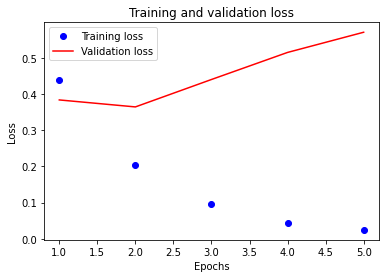

In [24]:
history_d = history.history
history_d.keys()

acc = history_d['accuracy']
val_acc = history_d['val_accuracy']
loss = history_d['loss']
val_loss = history_d['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()